使用R语言学习多元统计推断。

In [3]:
library(tidyverse)
library(easystats)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
# Attaching packages: easystats 0.7.4 (red = needs update)
<U+221A> bayestestR  0.15.2   <U+221A> correlation 0.8.7 
<U+221A> datawizard  1.0.2    <U+221A> effectsize  1.0.0 
x insight     1.1.0    <U+221A> modelbased  0.10.0
<U+221A> performance 0.13.0   <U+221A> parameters  0.24.2
<U+221A> report      0.6.1    <U+221A> see         0.11.0

Restart the R-Session and update packages with `easystats::easystats_update()`.




# 多元正态单总体的均值检验

In [4]:
data(LASERI, package = "ICSNP")

In [5]:
library(skimr)
skim(LASERI) %>% print()


Attaching package: 'skimr'


The following object is masked from 'package:insight':

    n_unique




-- Data Summary ------------------------
                           Values
Name                       LASERI
Number of rows             223   
Number of columns          32    
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  31    
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
  skim_variable n_missing complete_rate ordered n_unique top_counts        
1 Sex                   0             1 FALSE          2 Fem: 120, Mal: 103

-- Variable type: numeric ------------------------------------------------------
   skim_variable n_missing complete_rate     mean       sd       p0      p25
 1 Age                   0             1   34.0     5.21      26      29    
 2 Height                0             1  172.      9.21     151     165    
 3 Weight                0             1   76.8    15.2       49      64

In [6]:
library(modelsummary)
datasummary_skim(LASERI)


Attaching package: 'modelsummary'


The following object is masked from 'package:parameters':

    supported_models


The following object is masked from 'package:insight':

    supported_models





+----------+--------+--------------+--------+-------+---------+--------+--------+---------------------------------------------------------------+
|          | Unique | Missing Pct. | Mean   | SD    | Min     | Median | Max    | Histogram                                                     |
+==========+========+==============+========+=======+=========+========+========+===============================================================+
| Age      | 17     | 0            | 34.0   | 5.2   | 26.0    | 35.0   | 42.0   | ![](tinytable_assets/idwsr7hp9sehweswclwchn.png){ height=16 } |
+----------+--------+--------------+--------+-------+---------+--------+--------+---------------------------------------------------------------+
| Height   | 45     | 0            | 172.1  | 9.2   | 151.0   | 171.0  | 196.0  | ![](tinytable_assets/id0sgkfj5v10z7jbbecpef.png){ height=16 } |
+----------+--------+--------------+--------+-------+---------+--------+--------+------------------------------------------

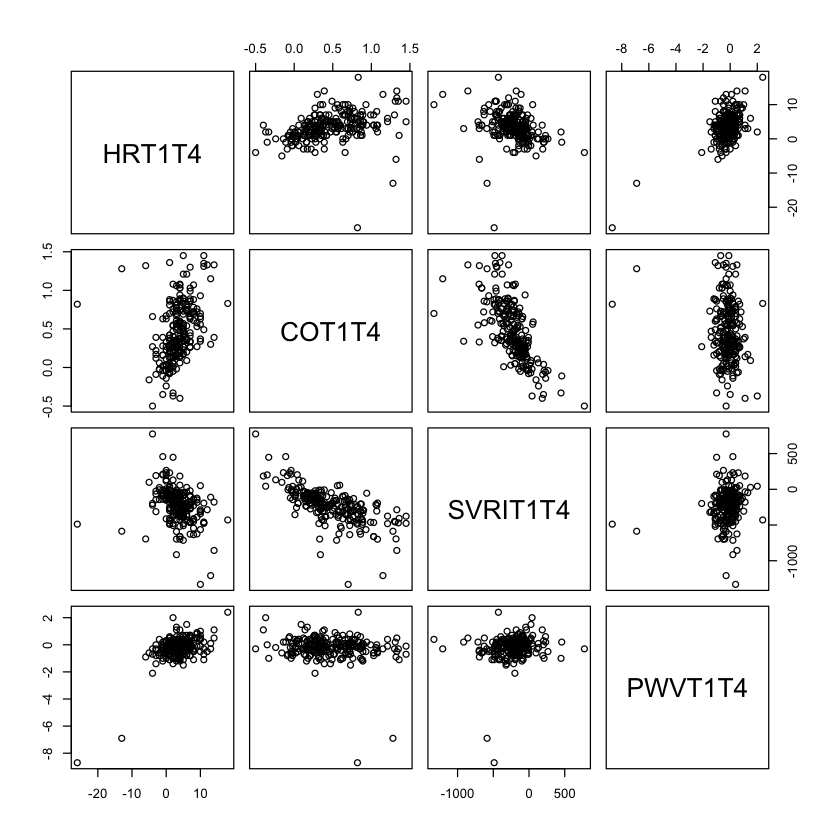

In [7]:
par(bg = "white")
pairs(LASERI[, 25:28])

In [9]:
ICSNP::HotellingsT2(LASERI[, 25:28], mu = c(0, 0, 0, 0))


	Hotelling's one sample T2-test

data:  LASERI[, 25:28]
T.2 = 101.67, df1 = 4, df2 = 219, p-value < 2.2e-16
alternative hypothesis: true location is not equal to c(0,0,0,0)


In [20]:
rrcov::T2.test(LASERI[, 25:28], mu = c(0, 0, 0, 0), alpha = 0.05)


	One-sample Hotelling test

data:  LASERI[, 25:28]
T2 = 412.27, F = 101.67, df1 = 4, df2 = 219, p-value < 2.2e-16
alternative hypothesis: true mean vector is not equal to (0, 0, 0, 0)' 

sample estimates:
                HRT1T4    COT1T4  SVRIT1T4    PWVT1T4
mean x-vector 3.529148 0.4668161 -224.3543 -0.2121076


# 独立两样本多元正态分布均值比较